# ElasticNet Regression

Elastic net is a regularized regression method that use L1 and L2 penalties of the lasso and ridge methods. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
Y = dataset['Adj Close']

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [5]:
X, Y = make_regression(n_features=2, random_state=0)

In [6]:
regr = ElasticNet(random_state=0)
regr.fit(X, Y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
print(regr.coef_)

[18.83816048 64.55968825]


In [8]:
print(regr.intercept_)

1.4512607561654027


In [9]:
print(regr.predict([[0, 0]]))

[1.45126076]


In [10]:
regr.score(X, Y, sample_weight=None)

0.8904453086976037

Stock ElasticNet Regression

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

C:\Users\Tin Hang\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
enet = ElasticNet(random_state=0)
enet = regr.fit(X_train, Y_train)

In [13]:
Y_pred = enet.predict(X_test)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


In [16]:
enet.score(X_train, Y_train)

0.8688235608979287

In [18]:
# score measure the proportion of correctly classified instances
enet.score(X_test, Y_test)

0.859843606021029

In [19]:
# coefficient is a constant by which a variable is multiplied
enet.coef_

array([19.34408276, 61.11112372])

In [20]:
enet.intercept_

-0.8197636133494073

In [26]:
from sklearn.metrics import r2_score

y_pred_enet = enet.fit(X_train, Y_train).predict(X_test)
r2_score_enet = r2_score(Y_test, Y_pred)

print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.859844


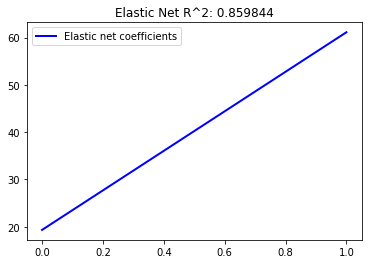

In [30]:
plt.plot(enet.coef_, color='blue', linewidth=2,
         label='Elastic net coefficients')
plt.legend(loc='best')
plt.title("Elastic Net R^2: %f"
          % (r2_score_enet))
plt.show()